# 22003185 - Nguyen Hoang Nguyen Vu


In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
import pickle


In [3]:
df = pd.read_csv('./iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Mô tả dữ liệu iris: The Iris dataset consists of 150 samples of iris flowers from three different
# species: Setosa, Versicolor, and Virginica. Each sample includes four features: sepal length, sepal
# width, petal length, and petal width. It was introduced by the British biologist and statistician
# Ronald Fisher in 1936 as an example of discriminant analysis
# Yêu cầu: Xây dựng mô hình dự báo chủng loại Species dựa trên các đặc trưng SepalLengthCm,
# SepalWidthCm, PetalLengthCm, PetalWidthCm

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
6
So chung loai: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.7586

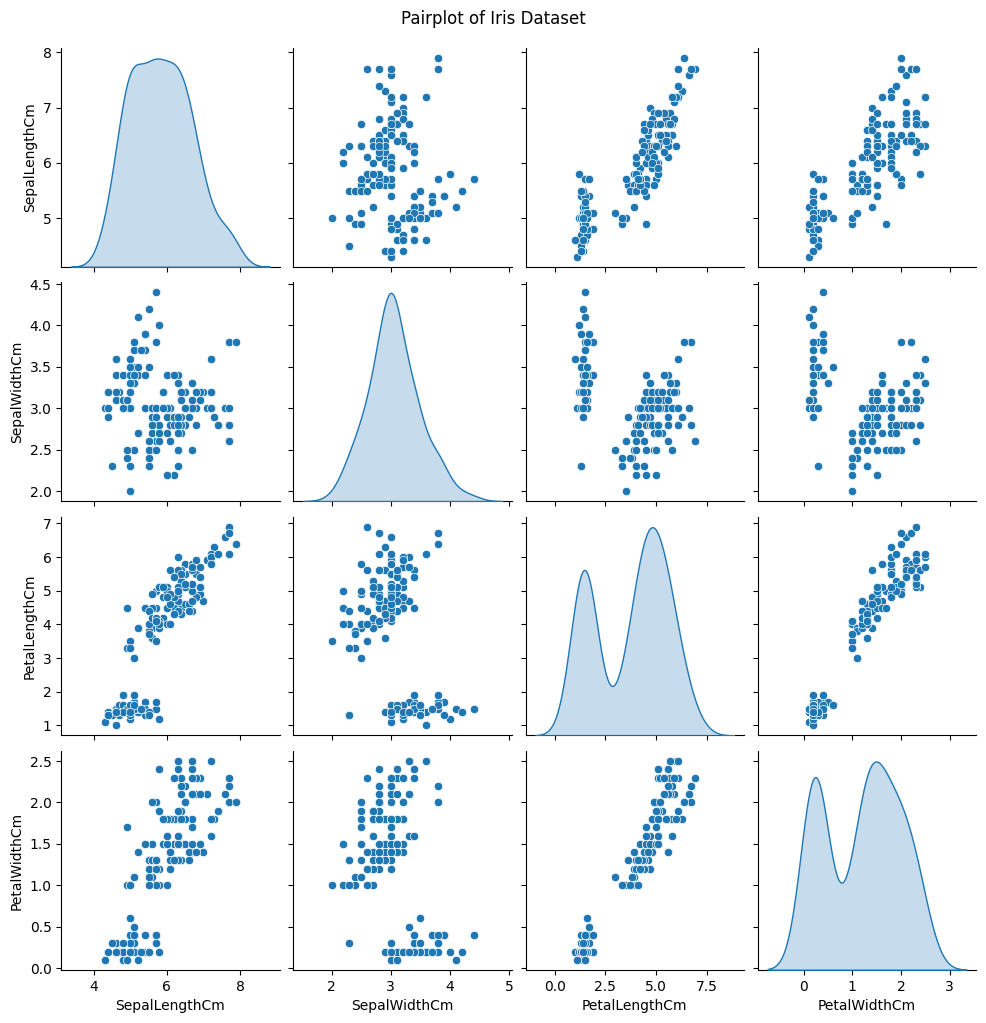

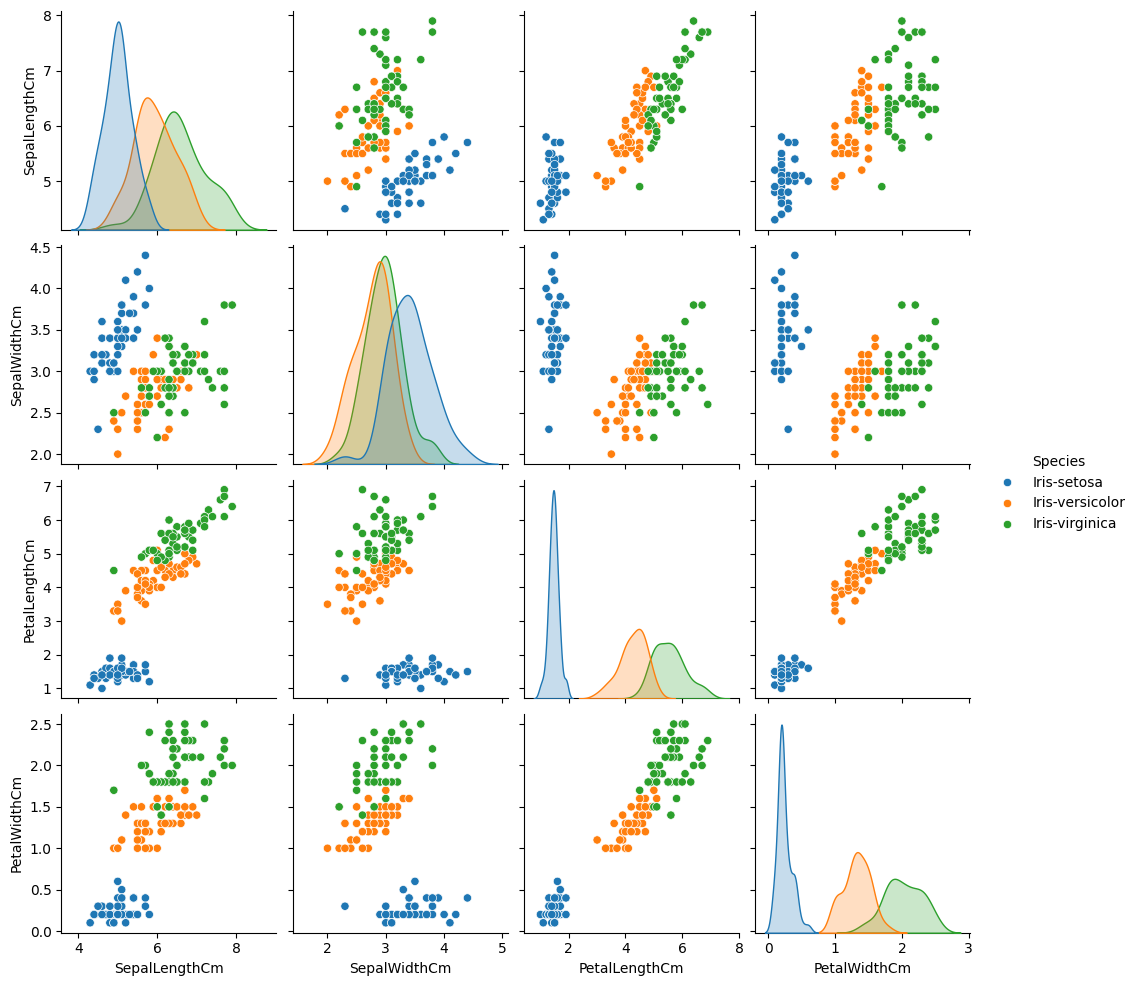

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


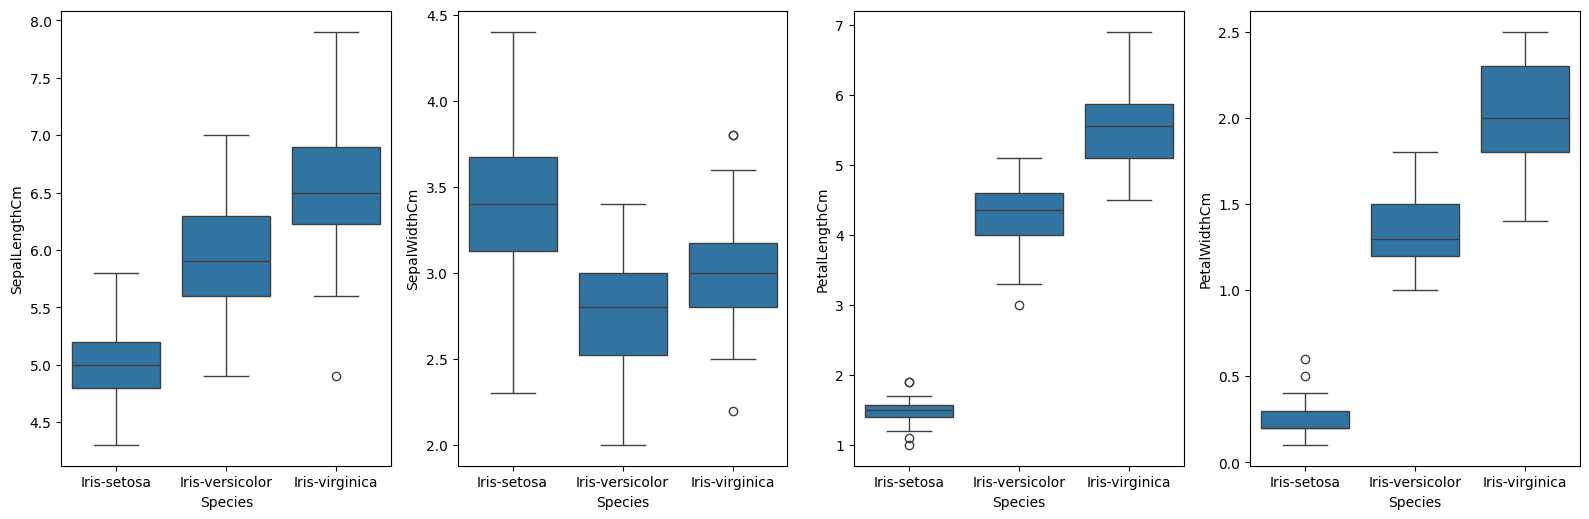

In [4]:
# 1. Tiến hành EDA dữ liệu:
# a. Có bao nhiêu đặc trưng và tên đặc trưng
print(df.columns)
print(df.columns.size)
# b. Có bao nhiêu chủng loài
print(f"So chung loai: {df.Species.nunique()}")
# c. Tổng quan dữ liệu kiểu dữ liệu và dữ liệu thiếu
print(df.info())
print(df.isnull().sum())

# d. Thống kê các đại lượng cơ bản cho các đặc trưng
print(df.describe())

# e. Thống kê các đại lượng cơ bản cho các đặc trưng theo nhóm chủng loài
print(df.groupby('Species').describe())
# f. Trực quan phân phối các đặc trưng và nhận xét
sns.pairplot(df.drop(columns=['Id']), diag_kind='kde')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()
# g. Trực quan phân phối các đặc trưng theo nhóm chủng loài và nhận xét
sns.pairplot(df.drop(columns=['Id']), hue='Species', diag_kind="kde")
plt.show()
# h. Khám phá các giá trị bất thường của các đặc trưng theo nhóm chủng loài

feature = df.drop(columns=['Id', 'Species']).columns
print(feature)

fig = plt.figure(figsize=(16, 10)) 
for i, col in enumerate(feature):
    fig.add_subplot(2, 4, i+1)
    sns.boxplot(data=df, x='Species', y=col)
plt.tight_layout()
plt.show()

In [7]:
# 2. Tập dữ liệu sử dụng tỉ lệ train:test là 75:25 với hệ số ngẫu nhiên là 16
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [8]:
print(X_train[0:5])

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
107            7.3           2.9            6.3           1.8
35             5.0           3.2            1.2           0.2
112            6.8           3.0            5.5           2.1
131            7.9           3.8            6.4           2.0
49             5.0           3.3            1.4           0.2


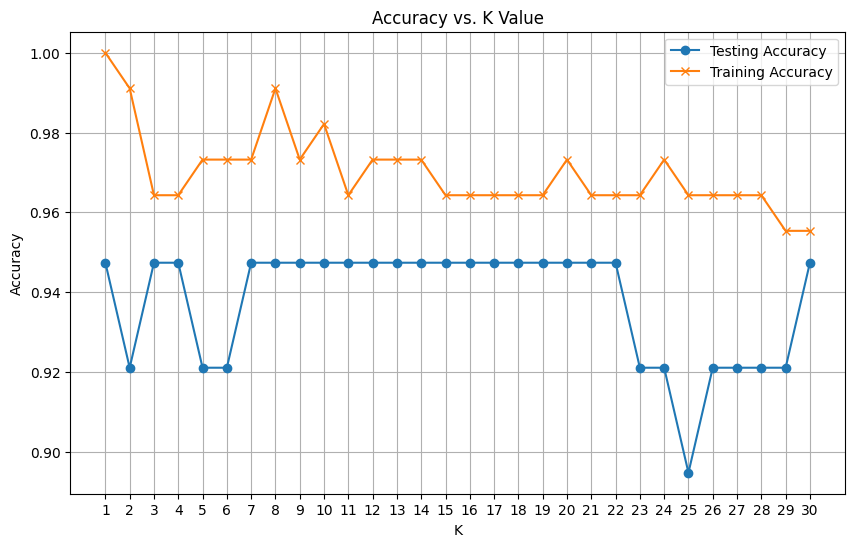

Giá trị K tối ưu: 1, với độ chính xác: 0.9474


In [28]:
# 3. Sử dụng biểu đồ để tìm giá trị K tốt nhất cho mô hình K-NN dựa theo độ đo chính xác để
# đánh giá
accuracy_list = []
train_accuracy = []
test_accuracy = []

best_k = 1
neighbors = np.arange(1, 31)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracy_list.append(accuracy)  

    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    # print(f'K: {k}, Test Accuracy: {accuracy:.4f}, Train Accuracy: {knn.score(X_train, y_train):.4f}')

    if accuracy > max(accuracy_list):
        best_k = k
        print(f'Update Best K: {best_k}, Accuracy: {accuracy:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_list, marker='o', label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, marker='x', label='Training Accuracy')
plt.legend()
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()
print(f'Giá trị K tối ưu: {best_k}, với độ chính xác: {test_accuracy[best_k - 1]:.4f}')



In [29]:
# 4. Sử dụng giá trị K tốt nhất để xây dựng mô hình
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [33]:
# 5. Cho biết độ đo chính xác (accuracy) trên tập dữ liệu đánh giá (test data set)
print(f'Accuracy: {knn.score(X_test, y_test):.4f}')
print(f'Train Accuracy: {knn.score(X_train, y_train):.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9474
Train Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.95        38
      macro avg       0.96      0.93      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [38]:
from sklearn.metrics import confusion_matrix

# 6. Xây dựng ma trận confusion matrix của mô hình trên tập dữ liệu test
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13  0  0]
 [ 0 15  0]
 [ 0  2  8]]


TN: 21, FP: 2, FN: 0, TP: 15
TPR: 1.0000, FNR: 0.0000, FPR: 0.0870, TNR: 0.9130
Precision: 0.8824, Recall: 1.0000, F1: 0.9375
ROC AUC: 0.9522


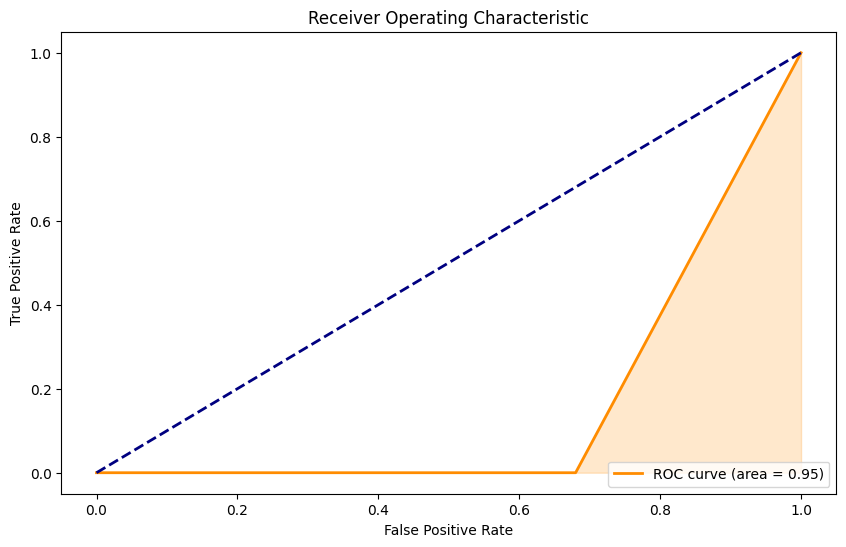

In [54]:
# 7. Với chủng loại: Iris-setosa
# a. Hãy cho biết các giá trị: [tn, fp, fn, tp], [TPR, FNR, FPR, TNR], [precision, recall, F1]
# Ensure confusion_matrix is calculated as a variable, not the function
# Extract the confusion matrix for the class 'Iris-setosa'
class_index = list(y_test.unique()).index('Iris-setosa')
tp = confusion_matrix[class_index, class_index]
fn = confusion_matrix[class_index, :].sum() - tp
fp = confusion_matrix[:, class_index].sum() - tp
tn = confusion_matrix.sum() - (tp + fn + fp)

print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
[TPR, FNR, FPR, TNR] = [tp / (tp + fn), fn / (tp + fn), fp / (fp + tn), tn / (fp + tn)]
print(f'TPR: {TPR:.4f}, FNR: {FNR:.4f}, FPR: {FPR:.4f}, TNR: {TNR:.4f}')
[precision, recall, f1] = [tp / (tp + fp), tp / (tp + fn), 2 * tp / (2 * tp + fp + fn)]
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

# b. Vẽ đồ thị AUC & ROC
y_pred_prob = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label='Iris-setosa')
# roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC: {roc_auc:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [55]:
# 8. Lưu trữ mô hình với tên file iris_knn
filename = 'iris_knn.sav'
pickle.dump(knn, open(filename, 'wb'))

In [56]:
# 9. Xây dựng chương trình dự báo chủng loại dựa trên các đặc trưng đầu vào.
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    knn = pickle.load(open(filename, 'rb'))
    prediction = knn.predict(input_data)
    return prediction[0]

In [57]:
# 10. Với các đặc trưng SepalLengthCm=4.5, SepalWidthCm=2.7, PetalLengthCm=2.0,
# PetalWidthCm=0.24 thì mô hình phân lớp sẽ dự báo là chủng loại nào?

species_prediction = predict_species(4.5, 2.7, 2.0, 0.24)
print(f'Species Prediction: {species_prediction}')

Species Prediction: Iris-setosa


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
